<H1> Developing AR Models for FTSE100Index

<H2> Importing the relevant packages

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.graphics.tsaplots as sgt
from statsmodels.tsa.arima.model import ARIMA
from scipy.stats.distributions import chi2
import statsmodels.tsa.stattools as sts

<H2> Loading ftse100 index data at the google colab

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving FTSE100_IndexData.csv to FTSE100_IndexData.csv


<H2> Setting for ignoring warnings

In [ ]:
import warnings
warnings.filterwarnings("ignore")

<H2> Loading ftse100 Index Data to the dataframe as time series data

In [ ]:
raw_cvs_data = pd.read_csv('FTSE100_IndexData.csv')
df_ftse100=raw_cvs_data.copy()
df_ftse100.date = pd.to_datetime(df_ftse100.date, dayfirst = True)
df_ftse100.set_index("date", inplace=True)
df_ftse100=df_ftse100.asfreq('b')
df_ftse100=df_ftse100.fillna(method='ffill')

<h2> Dividing the data into training and test

In [ ]:
size = int(len(df_ftse100)*0.8)
df, df_test = df_ftse100.iloc[:size], df_ftse100.iloc[size:]

<h2> Ploting ACF for ftse100 for 40 lags

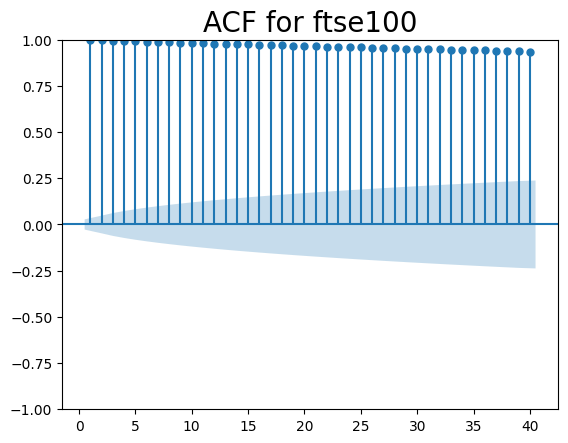

In [ ]:
sgt.plot_acf(df['ftse'], zero = False, lags = 40)
plt.title("ACF for ftse100", size = 20)
plt.show()

<h2> Plotting PACF for ftse100 for 40 lags

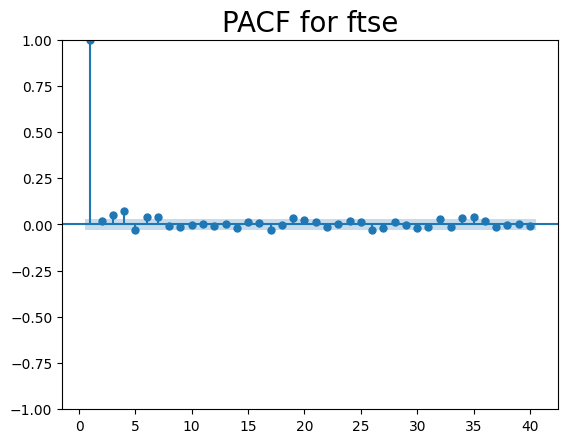

In [ ]:
sgt.plot_pacf(df['ftse'], lags = 40, alpha = 0.05, zero = False, method = ('ols'))
plt.title("PACF for ftse", size = 20)
plt.show()

<h2> Fitting very first AR(1) Model

In [ ]:
model_ar = ARIMA(df.ftse, order=(1,0,0))

In [ ]:
results_ar = model_ar.fit()

<H2> Fitting Higher Order AR Models

In [ ]:
model_ar_2 = ARIMA(df.ftse, order=(2,0,0))
results_ar_2 = model_ar_2.fit()
results_ar_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                   ftse   No. Observations:                 5021
Model:                 ARIMA(2, 0, 0)   Log Likelihood              -27621.949
Date:                Thu, 17 Aug 2023   AIC                          55251.898
Time:                        07:05:55   BIC                          55277.984
Sample:                    01-07-1994   HQIC                         55261.039
                         - 04-05-2013                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       5089.6409    368.251     13.821      0.000    4367.881    5811.400
ar.L1          0.9811      0.010     99.868      0.000       0.962       1.000
ar.L2          0.0171      0.010      1.749      0.080      -0.002       0.036
sigma2      3510.1277     41.037     85.535      0.000    3429.696    3590.560
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):              3282.81
Prob(Q):                              0.95   Prob(JB):                         0.00
Heteroskedasticity (H):               1.89   Skew:                            -0.19
Prob(H) (two-sided):                  0.00   Kurtosis:                         6.94
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [ ]:
model_ar_3 = ARIMA(df.ftse, order=(3,0,0))
results_ar_3 = model_ar_3.fit()
results_ar_3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                   ftse   No. Observations:                 5021
Model:                 ARIMA(3, 0, 0)   Log Likelihood              -27615.962
Date:                Thu, 17 Aug 2023   AIC                          55241.925
Time:                        07:06:33   BIC                          55274.532
Sample:                    01-07-1994   HQIC                         55253.351
                         - 04-05-2013                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       5089.6409    378.583     13.444      0.000    4347.631    5831.651
ar.L1          0.9802      0.010     99.076      0.000       0.961       1.000
ar.L2         -0.0309      0.013     -2.315      0.021      -0.057      -0.005
ar.L3          0.0489      0.009      5.383      0.000       0.031       0.067
sigma2      3502.2643     41.020     85.379      0.000    3421.866    3582.662
===================================================================================
Ljung-Box (L1) (Q):                   0.06   Jarque-Bera (JB):              3286.97
Prob(Q):                              0.80   Prob(JB):                         0.00
Heteroskedasticity (H):               1.90   Skew:                            -0.22
Prob(H) (two-sided):                  0.00   Kurtosis:                         6.94
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [ ]:
model_ar_4 = ARIMA(df.ftse, order=[4,0,0])
results_ar_4 = model_ar_4.fit()
results_ar_4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                   ftse   No. Observations:                 5021
Model:                 ARIMA(4, 0, 0)   Log Likelihood              -27602.680
Date:                Thu, 17 Aug 2023   AIC                          55217.359
Time:                        07:06:41   BIC                          55256.488
Sample:                    01-07-1994   HQIC                         55231.070
                         - 04-05-2013                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       5089.6409    391.960     12.985      0.000    4321.414    5857.868
ar.L1          0.9767      0.010     97.788      0.000       0.957       0.996
ar.L2         -0.0287      0.013     -2.129      0.033      -0.055      -0.002
ar.L3         -0.0224      0.013     -1.784      0.074      -0.047       0.002
ar.L4          0.0728      0.009      8.033      0.000       0.055       0.091
sigma2      3484.0262     41.922     83.108      0.000    3401.861    3566.191
===================================================================================
Ljung-Box (L1) (Q):                   0.02   Jarque-Bera (JB):              3044.18
Prob(Q):                              0.88   Prob(JB):                         0.00
Heteroskedasticity (H):               1.90   Skew:                            -0.28
Prob(H) (two-sided):                  0.00   Kurtosis:                         6.77
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

<H2> Log Likelihood Ratio Test

In [ ]:
def LLR_test(mod_1, mod_2, DF=1):
    L1 = mod_1.llf
    L2 = mod_2.llf
    LR = (2*(L2-L1))
    p = chi2.sf(LR, DF).round(3)
    return p

In [ ]:
LLR_test(results_ar_2, results_ar_3)

0.001

<H2> Comparing Lag 4 model with Lag 3

In [ ]:
model_ar_4 = ARIMA(df.ftse, order=(4,0,0))
results_ar_4 = model_ar_4.fit()
print(results_ar_4.summary())
print ("LLR test: " + str(LLR_test(results_ar_3, results_ar_4)))

                               SARIMAX Results                                
Dep. Variable:                   ftse   No. Observations:                 5021
Model:                 ARIMA(4, 0, 0)   Log Likelihood              -27602.680
Date:                Thu, 17 Aug 2023   AIC                          55217.359
Time:                        07:07:33   BIC                          55256.488
Sample:                    01-07-1994   HQIC                         55231.070
                         - 04-05-2013                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       5089.6409    391.960     12.985      0.000    4321.414    5857.868
ar.L1          0.9767      0.010     97.788      0.000       0.957       0.996
ar.L2         -0.0287      0.013     -2.129      0.0

In [ ]:
model_ar_5 = ARIMA(df.ftse, order=(5,0,0))
results_ar_5 = model_ar_5.fit()
print(results_ar_5.summary())
print("\nLLR test p-value = " + str(LLR_test(results_ar_4, results_ar_5)))

                               SARIMAX Results                                
Dep. Variable:                   ftse   No. Observations:                 5021
Model:                 ARIMA(5, 0, 0)   Log Likelihood              -27600.460
Date:                Thu, 17 Aug 2023   AIC                          55214.920
Time:                        07:07:40   BIC                          55260.570
Sample:                    01-07-1994   HQIC                         55230.916
                         - 04-05-2013                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       5089.6409    386.229     13.178      0.000    4332.646    5846.636
ar.L1          0.9788      0.010     97.867      0.000       0.959       0.998
ar.L2         -0.0293      0.013     -2.176      0.0

In [ ]:
model_ar_6 = ARIMA(df.ftse, order=(6,0,0))
results_ar_6 = model_ar_6.fit()
print(results_ar_6.summary())
print("\nLLR test p-value = " + str(LLR_test(results_ar_5, results_ar_6)))

                               SARIMAX Results                                
Dep. Variable:                   ftse   No. Observations:                 5021
Model:                 ARIMA(6, 0, 0)   Log Likelihood              -27596.587
Date:                Thu, 17 Aug 2023   AIC                          55209.174
Time:                        07:07:48   BIC                          55261.345
Sample:                    01-07-1994   HQIC                         55227.455
                         - 04-05-2013                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       5089.6409    396.932     12.822      0.000    4311.669    5867.613
ar.L1          0.9800      0.010     96.873      0.000       0.960       1.000
ar.L2         -0.0333      0.014     -2.438      0.0

In [ ]:
model_ar_7 = ARIMA(df.ftse, order=(7,0,0))
results_ar_7 = model_ar_7.fit()
print(results_ar_7.summary())
print("\nLLR test p-value = " + str(LLR_test(results_ar_6, results_ar_7)))

                               SARIMAX Results                                
Dep. Variable:                   ftse   No. Observations:                 5021
Model:                 ARIMA(7, 0, 0)   Log Likelihood              -27592.022
Date:                Thu, 17 Aug 2023   AIC                          55202.044
Time:                        07:07:56   BIC                          55260.736
Sample:                    01-07-1994   HQIC                         55222.610
                         - 04-05-2013                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       5089.6409    405.380     12.555      0.000    4295.112    5884.170
ar.L1          0.9783      0.010     95.742      0.000       0.958       0.998
ar.L2         -0.0304      0.014     -2.183      0.0

In [ ]:
model_ar_8 = ARIMA(df.ftse, order=(8,0,0))
results_ar_8 = model_ar_8.fit()
print(results_ar_8.summary())
print("\nLLR test p-value = " + str(LLR_test(results_ar_7, results_ar_8)))

                               SARIMAX Results                                
Dep. Variable:                   ftse   No. Observations:                 5021
Model:                 ARIMA(8, 0, 0)   Log Likelihood              -27591.854
Date:                Thu, 17 Aug 2023   AIC                          55203.708
Time:                        07:08:06   BIC                          55268.922
Sample:                    01-07-1994   HQIC                         55226.560
                         - 04-05-2013                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       5089.6409    407.242     12.498      0.000    4291.460    5887.821
ar.L1          0.9787      0.010     95.719      0.000       0.959       0.999
ar.L2         -0.0305      0.014     -2.183      0.0

<H2> Comparing AR(1) with AR(7)

In [ ]:
print("LLR test: " + str(LLR_test(results_ar, results_ar_7, DF = 6)))

LLR test: 0.0


<H2> Checking for the residuals from AR(7)

In [ ]:
df['residuals'] = results_ar_7.resid

In [ ]:
df.residuals.mean()

0.3519708987184303

In [ ]:
df.residuals.var()

4005.8220458242026

<h2> Checking ACF for residuals

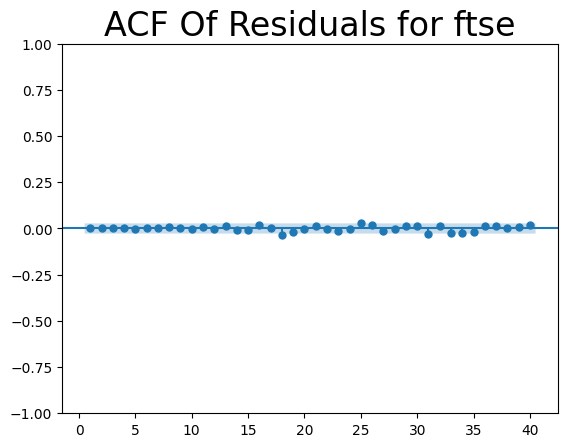

In [ ]:
sgt.plot_acf(df.residuals, zero = False, lags = 40)
plt.title("ACF Of Residuals for ftse",size=24)
plt.show()

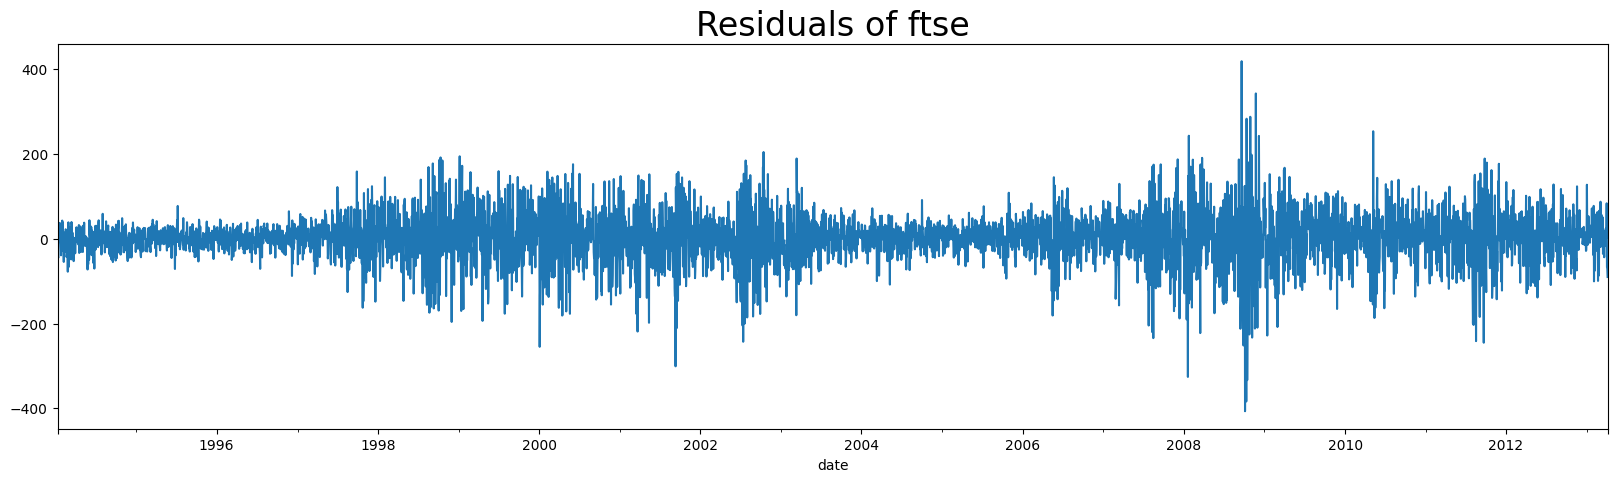

In [ ]:
df.residuals[1:].plot(figsize=(20,5))
plt.title("Residuals of ftse",size=24)
plt.show()

<H2> Computing out of sample errors from the selected model

In [ ]:
from sklearn.metrics import mean_squared_error
from math import sqrt
predictions = results_ar_7.predict(start=len(df+1), end= len(df)+len(df_test)-1, dynamic=False)
#print(len(predictions))
#for i in range(len(predictions)):
#print('predicted=%f, expected=%f' % (predictions[i], df_test.ftse[i]))
rmse = sqrt(mean_squared_error(df_test.ftse, predictions))
print('Test RMSE: %.3f' % rmse)

Test RMSE: 1242.509


In [ ]:
test=df_test

In [ ]:
test['prediction']=predictions

In [ ]:
test['difference']=test['ftse']-test['prediction']

In [ ]:
test

,ftse,prediction,difference
date,,,
2013-04-08,6276.940000,6247.956061,28.983939
2013-04-09,6313.200000,6246.144958,67.055042
2013-04-10,6387.370000,6244.336687,143.033313
2013-04-11,6416.140000,6242.531244,173.608756
2013-04-12,6384.390000,6240.728623,143.661377
...,...,...,...
2018-01-23,7731.827774,5253.197165,2478.630609
2018-01-24,7643.428966,5252.941429,2390.487537
2018-01-25,7615.839954,5252.686094,2363.153860


In [ ]:
df = pd.DataFrame({'Actual': test.ftse, 'Predicted': test.prediction})

In [ ]:
df

,Actual,Predicted
date,,
2013-04-08,6276.940000,6261.240684
2013-04-09,6313.200000,6264.785906
2013-04-10,6387.370000,6267.014864
2013-04-11,6416.140000,6267.614248
2013-04-12,6384.390000,6272.718337
...,...,...
2018-01-23,7731.827774,5324.063961
2018-01-24,7643.428966,5323.759806
2018-01-25,7615.839954,5323.456046


<Axes: xlabel='date'>

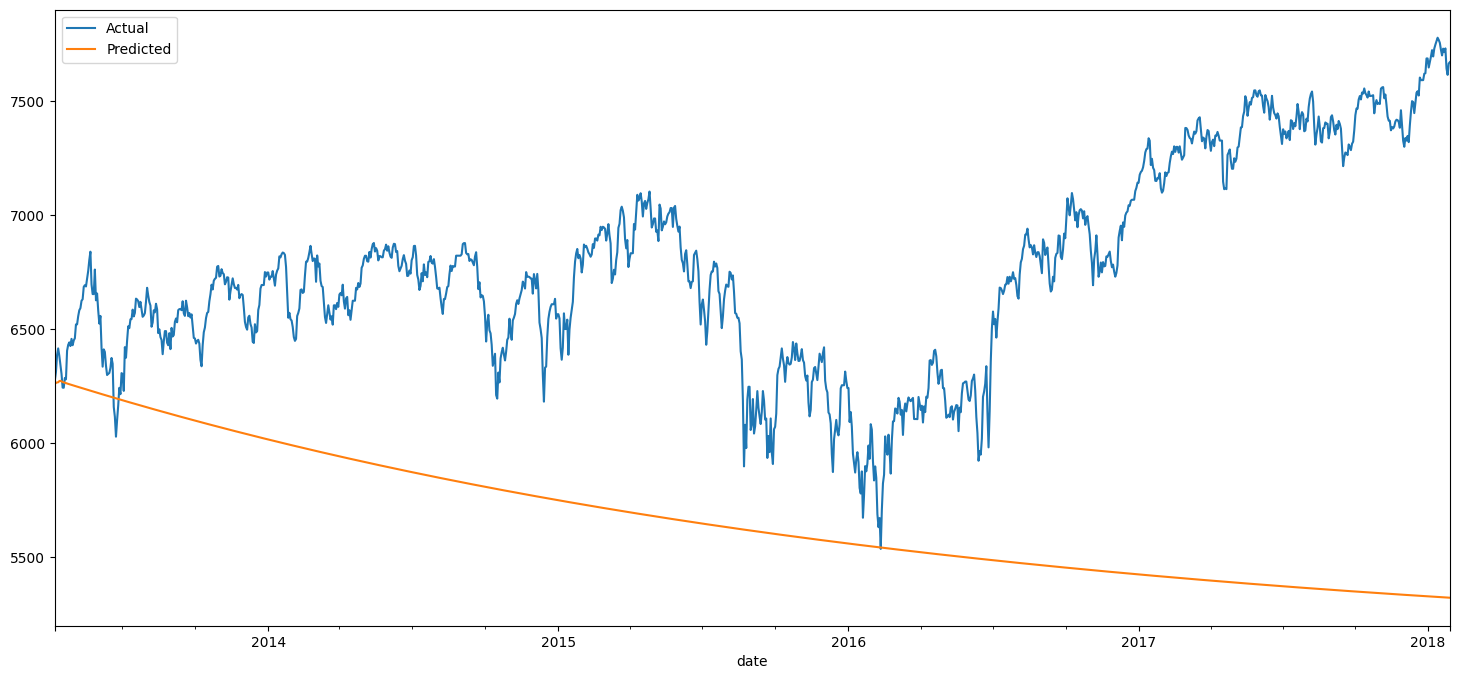

In [ ]:
df.plot(kind='line',figsize=(18,8))